# Sentimen Analisis Aplikasi BCA Mobile

Proyek Sentimen Analisis oleh :
Mufidah Shofi Aqilah
(M297D5X1159)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Load Dataset

In [2]:
# ===== Baca dataset csv yang sudah tersimpan sebelumnya =====

df = pd.read_csv('bcamobile_reviews.csv')

In [3]:
# ===== Bersihkan data dari nilai null dan duplicates =====

clean_df = df.dropna()
clean_df = clean_df.drop_duplicates()
print("Jumlah data null : ")
display(clean_df.isnull().sum())

# ===== Menampilkan isi dataset =====
print("Preview Dataset : ")
display(clean_df.head())

Jumlah data null : 


reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64

Preview Dataset : 


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,14bdf7b5-385d-478c-8855-259b1b0c9984,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"versi baru buruk sekali, font tulisan lebar je...",1,0,4.7.5,2025-10-27 23:20:55,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-10-27 23:57:48,4.7.5
1,fe31d247-1456-4344-8ced-853bcafb3bc7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,setiap transaksi mau Qris atau top up Flazz ka...,1,0,4.7.5,2025-10-27 12:10:29,"Mohon maaf atas kendala yang Bapak/Ibu alami, ...",2025-10-27 12:30:49,4.7.5
2,e768399b-3220-4851-bad2-f5bda7d2cca9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tiap masuk ke game gebyar bca kenapaa ga bisa2...,2,10,4.7.4,2025-10-13 23:46:37,Mohon maaf atas ketidaknyamanan yang Bapak/Ibu...,2025-10-14 01:12:19,4.7.4
3,e680ca60-0f7d-456a-9240-cf8c0f235294,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi bagus, sayang fitur Qris sering terga...",4,8,4.7.4,2025-10-09 02:07:21,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-10-09 08:39:25,4.7.4
4,f874b9c6-ff47-4407-af87-f4a52f16bf27,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sering banget jam 12 Malam sampe 4.30 pagi apl...,2,3,4.7.4,2025-10-19 01:29:25,Mohon maaf atas ketidaknyamanan yang Bapak/Ibu...,2025-10-19 01:45:07,4.7.4


### 2. Text Preprocessing

In [4]:
%pip install Sastrawi nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# ===== Fungsi untuk membersihkan, memproses, dan mempersiapkan teks mentah =====

# clean_text
def clean_text(text):
  text = text.lower()
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#[A-Za-z0-9]+', '', text)
  text = re.sub(r'RT[\s]', '', text)
  text = re.sub(r"http\S+", '', text)
  text = re.sub(r'[0-9]+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
  text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
  text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks

  return text

# tokenizing_text
def tokenizing_text(text):
  text = word_tokenize(text)
  return text

# filtering_text (hapus stopwords)
def filtering_text(text):
  listStopword = set(stopwords.words('indonesian'))
  listStopword1 = set(stopwords.words('english'))
  listStopword.update(listStopword1)
  listStopword.update(["yg", "dg", "rt", "dgn", "ny", "d", 'klo',
                      'kalo', 'amp', 'biar', 'bikin', 'bilang',
                      'gak', 'ga', 'aja', 'akan', 'atau', 'banget', 'banyak', 'bgt', 'bisa',
                      'buat', 'deh', 'dlm', 'dst', 'emang', 'gak', 'gini', 'gitu', 'gue',
                      'jg', 'juga', 'kalo', 'kan', 'kayak', 'krn', 'lg', 'mah', 'makin',
                      'membuat', 'memang', 'mereka', 'mrk', 'nya', 'pas', 'pasti', 'saja',
                      'salah', 'saling', 'sama', 'sgt', 'sih', 'spt', 'sy', 'tdk', 'tapi',
                      'telah', 'tentang', 'terus', 'tp', 'tsb', 'udah', 'utk', 'yg', 'gak',
                      'kek', 'kok', 'deh', 'dong', 'nih', 'lho', 'si', 'ya', 'yuk', 'ayo',
                      'hai', 'halo', 'oke', 'ok', 'sip', 'yoi', 'mantap', 'bang', 'sob',
                      'gan', 'sis', 'bro', 'coy', 'cuk', 'njir', 'anjir', 'bgs', 'bgt',
                      'bkn', 'dn', 'jd', 'jg', 'klo', 'kmrn', 'lgi', 'malahan', 'malah',
                      'mdh2n', 'mnrt', 'moga', 'mgkn', 'mksh', 'n', 'nah', 'ni', 'pdhl',
                      'shrsnya', 'skrg', 'sndiri', 'sy', 'trs', 'tmn', 'udah', 'untk',
                      'wa'
                      ])
  filtered = []
  for txt in text:
    if txt not in listStopword:
      filtered.append(txt)
  text = filtered
  return text

# stemming_text
def stemming_text(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  words = text.split()
  stemmed_words = [stemmer.stem(word) for word in words]
  stemmed_text = ' '.join(stemmed_words)
  return stemmed_text

def toSentence(list_words):
  sentence = ' '.join(word for word in list_words)
  return sentence

In [7]:
# hapus slangwords
slangwords = {
    'yg': 'yang', 'dg': 'dengan', 'rt': 'read tweet', 'dgn': 'dengan', 'ny': 'nya',
    'klo': 'kalau', 'kalo': 'kalau', 'amp': 'sampai', 'bikin': 'membuat', 'blg': 'bilang',
    'gak': 'tidak', 'ga': 'tidak', 'aja': 'saja', 'akn': 'akan', 'ato': 'atau',
    'banget': 'sekali', 'bgt': 'banget', 'bgt': 'sangat', 'bs': 'bisa', 'buat': 'untuk',
    'dlm': 'dalam', 'dst': 'dan seterusnya', 'emang': 'memang', 'gini': 'begini',
    'gitu': 'begitu', 'gue': 'saya', 'jg': 'juga', 'juga': 'juga', 'kan': 'kan',
    'kayak': 'seperti', 'krn': 'karena', 'lg': 'lagi', 'mah': 'mah', 'makin': 'semakin',
    'membuat': 'membuat', 'emng': 'memang', 'mrk': 'mereka', 'slg': 'saling', 'sm': 'sama',
    'sgt': 'sangat', 'sih': 'sih', 'spt': 'seperti', 'sy': 'saya', 'tdk': 'tidak',
    'tapi': 'tapi', 'telah': 'telah', 'tentang': 'tentang', 'terus': 'terus', 'tp': 'tapi',
    'tsb': 'tersebut', 'udah': 'sudah', 'utk': 'untuk', 'kek': 'seperti', 'kok': 'kok',
    'deh': 'deh', 'dong': 'dong', 'nih': 'nih', 'lho': 'lho', 'si': 'si',
    'ya': 'ya', 'yuk': 'yuk', 'ayo': 'ayo', 'hai': 'hai', 'halo': 'halo',
    'oke': 'oke', 'ok': 'ok', 'sip': 'sip', 'yoi': 'yoi', 'mantap': 'mantap',
    'bang': 'bang', 'sob': 'sob', 'gan': 'gan', 'sis': 'sis', 'bro': 'bro',
    'coy': 'coy', 'cuk': 'cuk', 'njir': 'anjir', 'anjir': 'anjir', 'bgs': 'bagus',
    'bgt': 'banget', 'bkn': 'bukan', 'dn': 'dan', 'jd': 'jadi', 'kmrn': 'kemarin',
    'lgi': 'lagi', 'malahan': 'malahan', 'malah': 'malah', 'mdh2n': 'mudah-mudahan',
    'mnrt': 'menurut', 'moga': 'semoga', 'mgkn': 'mungkin', 'mksh': 'terima kasih', 'n': 'dan',
    'nah': 'nah', 'ni': 'ini', 'pdhl': 'padahal', 'shrsnya': 'seharusnya', 'skrg': 'sekarang',
    'sndiri': 'sendiri', 'trs': 'terus','tmn': 'teman','untk': 'untuk','wa': 'whatsapp'
}

def fix_slangwords(text):
  words = text.split()
  fixed_words = []

  for word in words:
    if word.lower() in slangwords:
      fixed_words.append(slangwords[word.lower()])
    else:
      fixed_words.append(word)

  return ' '.join(fixed_words)

In [8]:
# ===== Jalankan semua fungsi preprocessing text =====

clean_df['text_clean'] = clean_df['content'].apply(clean_text)
clean_df['text_slangwords'] = clean_df['text_clean'].apply(fix_slangwords)
clean_df['text_tokenizing'] = clean_df['text_slangwords'].apply(tokenizing_text)
clean_df['text_stopword'] = clean_df['text_tokenizing'].apply(filtering_text)
clean_df['clean_content'] = clean_df['text_stopword'].apply(toSentence)

In [9]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_slangwords,text_tokenizing,text_stopword,clean_content
0,14bdf7b5-385d-478c-8855-259b1b0c9984,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"versi baru buruk sekali, font tulisan lebar je...",1,0,4.7.5,2025-10-27 23:20:55,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-10-27 23:57:48,4.7.5,versi baru buruk sekali font tulisan lebar jel...,versi baru buruk sekali font tulisan lebar jel...,"[versi, baru, buruk, sekali, font, tulisan, le...","[versi, buruk, font, tulisan, lebar, jelek, je...",versi buruk font tulisan lebar jelek jeda anim...
1,fe31d247-1456-4344-8ced-853bcafb3bc7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,setiap transaksi mau Qris atau top up Flazz ka...,1,0,4.7.5,2025-10-27 12:10:29,"Mohon maaf atas kendala yang Bapak/Ibu alami, ...",2025-10-27 12:30:49,4.7.5,setiap transaksi mau qris atau top up flazz ka...,setiap transaksi mau qris atau top up flazz ka...,"[setiap, transaksi, mau, qris, atau, top, up, ...","[transaksi, qris, top, flazz, tulisan, ganggua...",transaksi qris top flazz tulisan gangguan siny...
2,e768399b-3220-4851-bad2-f5bda7d2cca9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,tiap masuk ke game gebyar bca kenapaa ga bisa2...,2,10,4.7.4,2025-10-13 23:46:37,Mohon maaf atas ketidaknyamanan yang Bapak/Ibu...,2025-10-14 01:12:19,4.7.4,tiap masuk ke game gebyar bca kenapaa ga bisa ...,tiap masuk ke game gebyar bca kenapaa tidak bi...,"[tiap, masuk, ke, game, gebyar, bca, kenapaa, ...","[masuk, game, gebyar, bca, kenapaa, yaa, konek...",masuk game gebyar bca kenapaa yaa koneksi terp...
3,e680ca60-0f7d-456a-9240-cf8c0f235294,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi bagus, sayang fitur Qris sering terga...",4,8,4.7.4,2025-10-09 02:07:21,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2025-10-09 08:39:25,4.7.4,aplikasi bagus sayang fitur qris sering tergan...,aplikasi bagus sayang fitur qris sering tergan...,"[aplikasi, bagus, sayang, fitur, qris, sering,...","[aplikasi, bagus, sayang, fitur, qris, tergang...",aplikasi bagus sayang fitur qris terganggu sal...
4,f874b9c6-ff47-4407-af87-f4a52f16bf27,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sering banget jam 12 Malam sampe 4.30 pagi apl...,2,3,4.7.4,2025-10-19 01:29:25,Mohon maaf atas ketidaknyamanan yang Bapak/Ibu...,2025-10-19 01:45:07,4.7.4,sering banget jam malam sampe pagi aplikasi ...,sering sekali jam malam sampe pagi aplikasi se...,"[sering, sekali, jam, malam, sampe, pagi, apli...","[jam, malam, sampe, pagi, aplikasi, pemelihara...",jam malam sampe pagi aplikasi pemeliharaan sis...


### 3. Pelabelan Data

In [10]:
import csv
import requests
from io import StringIO

# ===== Baca data kamus kata-kata positif =====
lexicon_pos = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
  reader = csv.reader(StringIO(response.text), delimiter=',')
  for row in reader:
    lexicon_pos[row[0]] = int(row[1])

else:
  print("Gagal memuat data lexicon positif")

# ===== Baca data kamus kata-kata negatif =====
lexicon_neg = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
  reader = csv.reader(StringIO(response.text), delimiter=',')
  for row in reader:
    lexicon_neg[row[0]] = int(row[1])

else:
  print("Gagal memuat data lexicon negatif")

### 4. Tentukan Polaritas Sentimen

In [11]:
def sentimen_analisis(text):
  score = 0
  for word in text:
    if(word in lexicon_pos):
      score = score + lexicon_pos[word]

  for word in text:
    if(word in lexicon_neg):
      score = score + lexicon_neg[word]

  sentiment = ''

  if(score > 0):
    sentiment = 'positif'
  elif(score < 0):
    sentiment = 'negatif'
  else:
    sentiment = 'netral'

  return score, sentiment

In [12]:
results = clean_df['text_stopword'].apply(sentimen_analisis)
results = list(zip(*results))
clean_df['sentiment_score'] = results[0]
clean_df['sentiment'] = results[1]
print(clean_df['sentiment'].value_counts())

sentiment
negatif    23561
positif    13309
netral      3354
Name: count, dtype: int64


In [13]:
clean_df[['content', 'clean_content', 'sentiment_score', 'sentiment']].head()

,content,clean_content,sentiment_score,sentiment
0,"versi baru buruk sekali, font tulisan lebar je...",versi buruk font tulisan lebar jelek jeda anim...,0,netral
1,setiap transaksi mau Qris atau top up Flazz ka...,transaksi qris top flazz tulisan gangguan siny...,18,positif
2,tiap masuk ke game gebyar bca kenapaa ga bisa2...,masuk game gebyar bca kenapaa yaa koneksi terp...,-15,negatif
3,"aplikasi bagus, sayang fitur Qris sering terga...",aplikasi bagus sayang fitur qris terganggu sal...,2,positif
4,sering banget jam 12 Malam sampe 4.30 pagi apl...,jam malam sampe pagi aplikasi pemeliharaan sis...,-2,negatif


### Ekstraksi Fitur dan Algoritma Klasifikasi

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = clean_df['clean_content']
y = clean_df['sentiment']

In [15]:
# ===== 1. Ekstraksi Fitur : TF-IDF + SVM (split 90/10) =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# objek model SVM
svm_model = SVC(kernel='linear')

# latih model SVM
svm_model.fit(X_train_tfidf, y_train)

# prediksi sentimen
y_pred_svm = svm_model.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Akurasi SVM (TF-IDF):", accuracy_svm)
print("Laporan Klasifikasi SVM (TF-IDF):\n", report_svm)


Akurasi SVM (TF-IDF): 0.8891374596072583
Laporan Klasifikasi SVM (TF-IDF):
               precision    recall  f1-score   support

     negatif       0.90      0.96      0.93      2329
      netral       0.77      0.28      0.41       325
     positif       0.89      0.92      0.90      1369

    accuracy                           0.89      4023
   macro avg       0.85      0.72      0.75      4023
weighted avg       0.88      0.89      0.88      4023



In [16]:
# ===== 2. Ekstraksi Fitur : TF-IDF + Logistic Regression (split 70/30) =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# objek model LR
lr_model = LogisticRegression()

# latih model LR
lr_model.fit(X_train_tfidf, y_train)

# prediksi sentimen
y_pred_lr = lr_model.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Akurasi Logistic Regression :", accuracy_lr)
print("Laporan Klasifikasi Logistic Regression :\n", report_lr)


Akurasi Logistic Regression : 0.8799303944315545
Laporan Klasifikasi Logistic Regression :
               precision    recall  f1-score   support

     negatif       0.89      0.96      0.92      7054
      netral       0.75      0.21      0.33      1016
     positif       0.88      0.91      0.89      3998

    accuracy                           0.88     12068
   macro avg       0.84      0.69      0.72     12068
weighted avg       0.87      0.88      0.86     12068



In [17]:
# ===== 3. Ekstraksi Fitur : Bag of Words (CountVectorizer) + SVM (split 80/20) =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

count_vectorizer = CountVectorizer(max_features=1000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# objek model SVM
svm_model = SVC(kernel='linear')

# latih model SVM
svm_model.fit(X_train_count, y_train)

# prediksi sentimen
y_pred_svm = svm_model.predict(X_test_count)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Akurasi SVM (BoW):", accuracy_svm)
print("Laporan Klasifikasi SVM (BoW):\n", report_svm)

Akurasi SVM (BoW): 0.8950944647000332
Laporan Klasifikasi SVM (BoW):
               precision    recall  f1-score   support

     negatif       0.93      0.95      0.94      7054
      netral       0.60      0.51      0.55      1016
     positif       0.90      0.90      0.90      3998

    accuracy                           0.90     12068
   macro avg       0.81      0.79      0.80     12068
weighted avg       0.89      0.90      0.89     12068



Pie Chart

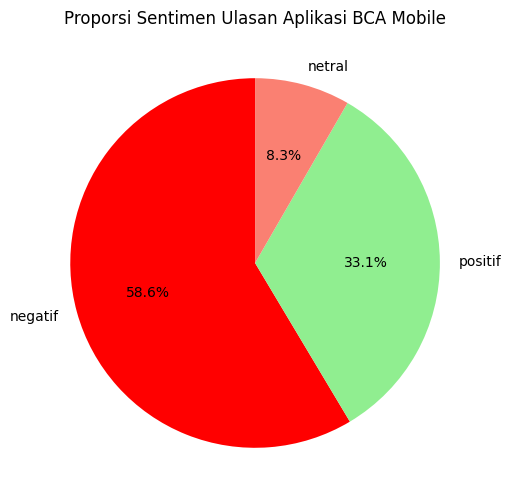

In [18]:
import matplotlib.pyplot as plt

# Menghitung jumlah ulasan untuk setiap polaritas
polarity_counts = clean_df['sentiment'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'lightgreen', 'salmon'])
plt.title('Proporsi Sentimen Ulasan Aplikasi BCA Mobile')
plt.show()

In [19]:
%pip install pipreqsnb

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Algoritma Deep Learning

In [20]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np


In [22]:
X_text = clean_df['clean_content']
y = clean_df['sentiment'].map({'negatif':0, 'netral':1, 'positif':2})

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_text)
sequences = tokenizer.texts_to_sequences(X_text)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights))
print(class_weights)


{0: np.float64(0.5678313040409387), 1: np.float64(4.008345789735924), 2: np.float64(1.0106787273469644)}


In [29]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',   # atau 'val_accuracy'
    patience=3,           # berhenti kalau 3 epoch berturut-turut gak membaik
    restore_best_weights=True
)



In [31]:
# ===== Bangun model LSTM =====
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    LSTM(100, dropout=0.3, recurrent_dropout=0.3),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary

# ===== Training Model =====
model.fit(
    X_train, y_train,
    epochs=30,             # kasih batas atas aja
    batch_size=32,
    validation_split=0.1,
    class_weight=class_weights,
    callbacks=[early_stop]
)

Epoch 1/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 64s 67ms/step - accuracy: 0.2881 - loss: 1.0990 - val_accuracy: 0.3300 - val_loss: 1.0964
Epoch 2/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 66s 73ms/step - accuracy: 0.2389 - loss: 1.0981 - val_accuracy: 0.5848 - val_loss: 1.0959
Epoch 3/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 66s 73ms/step - accuracy: 0.4596 - loss: 1.0980 - val_accuracy: 0.0851 - val_loss: 1.1061
Epoch 4/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 80s 88ms/step - accuracy: 0.3810 - loss: 1.0979 - val_accuracy: 0.0851 - val_loss: 1.1035
Epoch 5/30
906/906 ━━━━━━━━━━━━━━━━━━━━ 80s 88ms/step - accuracy: 0.3010 - loss: 1.0979 - val_accuracy: 0.0851 - val_loss: 1.1045


In [25]:
# ===== Evaluasi Model =====
loss, acc = model.evaluate(X_test, y_test)
print(f"Akurasi Model LSTM :  {acc:.4f}")

252/252 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5806 - loss: 0.8906
Akurasi Model LSTM :  0.5806
